Objective : 
To expose the best combination for strategy games available in the AppStore in order to get a good user rating (4.0/5.0 and above).

1. Perform Data Preparation by cleaning the data and removing null values.
2. Identify Which genres have higher user ratings.
3. Identify the trend of user ratings based on pricing.
4. State your inferences.

Data cleaning

1. All the unncessary coloumns such as URL, Subtitle, Icon URL, Description and In-App Purchases are dropped because they do not contribute to the user rating of the apps.
2. All the rows which have incomplete or NULL data in their user rating coloumn have benn dropped.
3. The average user rating is the mean of the user rating count. Therfore if the user rating count is veery less the Average user Rating will be on the extremes. Therefore user rating count with less than 300 have been dropped to give an unbaised analysis.

In [41]:
#data cleansing of the given appstore_games dataSet
import pandas as pd
data = pd.read_csv("appstore_games.csv")


In [42]:
#dropping all the unnecessary coloumns
data.drop("In-app Purchases", inplace=True, axis=1)
data.drop("URL", inplace=True, axis=1)
data.drop("Icon URL", inplace=True, axis=1)
data.drop("Description", inplace=True, axis=1)
data.drop("Subtitle", inplace=True, axis=1)

In [43]:
#dropping thew rows with NULL values in them
data.dropna()

,ID,Name,Average User Rating,User Rating Count,Price,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,284921427,Sudoku,4.0,3553.0,2.99,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11-07-2008,30-05-2017
1,284926400,Reversi,3.5,284.0,1.99,Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11-07-2008,17-05-2018
2,284946595,Morocco,3.0,8376.0,0.00,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11-07-2008,05-09-2017
3,285755462,Sudoku (Free),3.5,190394.0,0.00,Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23-07-2008,30-05-2017
4,285831220,Senet Deluxe,3.5,28.0,2.99,RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18-07-2008,22-07-2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16950,1473084135,Die Last,3.0,6.0,0.00,Jie Yang,12+,"EN, ZH",151308288.0,Games,"Games, Strategy, Entertainment, Puzzle",31-07-2019,31-07-2019
16956,1473181500,Basic Slosh,5.0,30.0,0.00,Ashnell Marchand,4+,EN,79646720.0,Games,"Games, Entertainment, Action, Strategy",23-07-2019,23-07-2019
16962,1473559573,Idle Racing Tycoon,5.0,51.0,0.00,Carson Brody,9+,EN,125348864.0,Games,"Games, Simulation, Strategy",31-07-2019,31-07-2019
16967,1473680543,Glow Hockey Strike,5.0,5.0,0.00,Samir Jabeur,4+,EN,128687104.0,Games,"Games, Simulation, Strategy",28-07-2019,28-07-2019


In [44]:
#The average user rating is based on the user ratings count. 
#So to prevent baised analysis of the app rating, we are dropping the apps with less than 300 user rating count
low_count = data[ (data['User Rating Count'] >= 0) & (data['User Rating Count'] <= 300) ].index
data.drop(low_count , inplace=True)


C:\Users\jawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\jawal\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


Text(0.5, 1.0, 'Distribution of Rating')

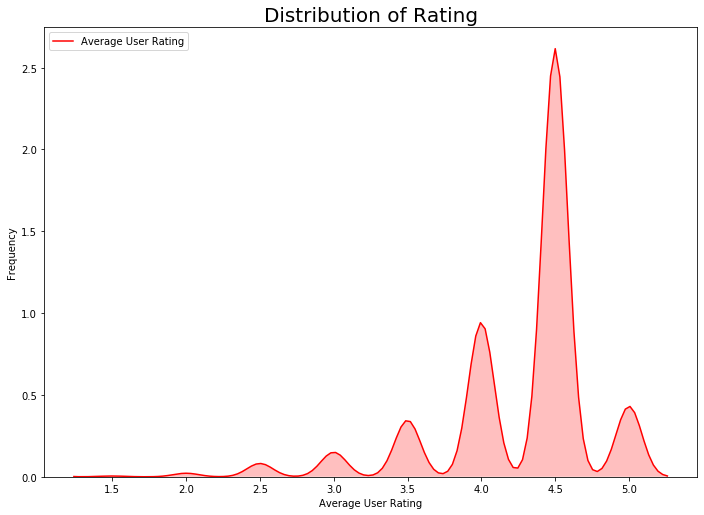

In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from pylab import rcParams
rcParams['figure.figsize'] = 11.7,8.27
g = sns.kdeplot(data['Average User Rating'], color="Red", shade = True)
g.set_xlabel("Average User Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)

the trend of user ratings based on pricing.

Text(0.5, 1.0, 'Price vs Rating')

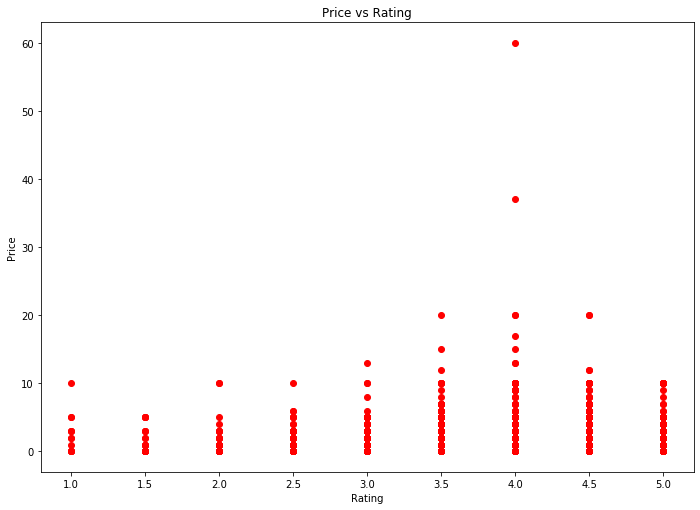

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('appstore_games (2).csv')
dataset = dataset[dataset.Price <100]
X = dataset.iloc[:, 2:3].values
y = dataset.iloc[:, 4].values
#trends of user rating based on App Price 
plt.scatter(X, y, color = 'red')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price vs Rating')

In [47]:
data1 = data[(data['Average User Rating'] >= 4.0)]  


In [48]:
GenresL = data.Genres.unique()
GenresDict = {}
for i in range(len(GenresL)):
    GenresDict[GenresL[i]] = i
data['Genres_c'] = data['Genres'].map(GenresDict).astype(int)
data = data[np.logical_not(np.isnan(data['Average User Rating']))]
data = data.reset_index(drop = True)


In [49]:
p = data.iloc[:, 13:14].values
q = data.iloc[:, 2].values

Text(0.5, 1.0, 'Genres_c vs rating')

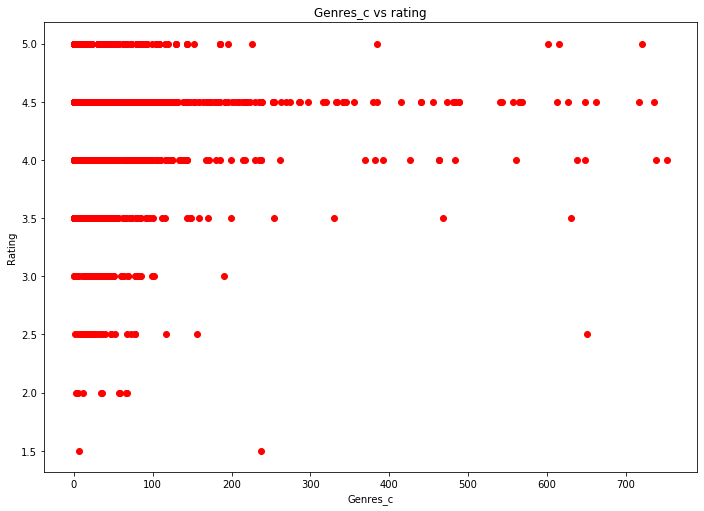

In [50]:
plt.scatter(p, q, color = 'red')
plt.xlabel('Genres_c')
plt.ylabel('Rating')
plt.title('Genres_c vs rating')


Text(0.5, 1.0, 'Price vs Rating(4.0 and above)')

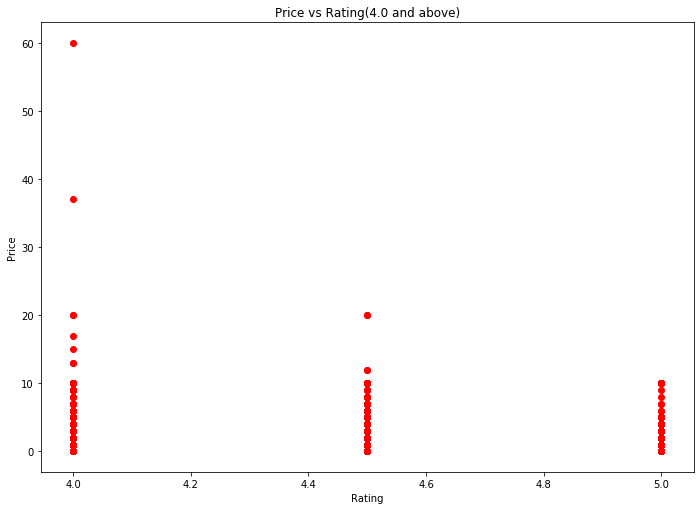

In [51]:
#graph for apps with rating above 4.0 vs price
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data1 = dataset[(dataset['Average User Rating'] >= 4.0)]
a = data1.iloc[:, 2:3].values
b = data1.iloc[:, 4].values
#trends of user rating based on App Price 
plt.scatter(a, b, color = 'red')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.title('Price vs Rating(4.0 and above)')

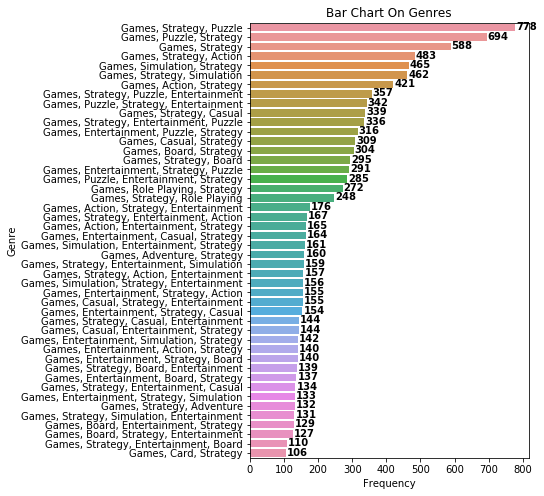

In [52]:
data3 = pd.read_csv("appstore_games.csv")
list_2 = ['Genres']
import seaborn as sns
def bar_plot(x,y,y_label,x_label,title,color,ax=None):
    plt.figure(figsize=(5,8))
    bar = sns.barplot(x = x,y=y,orient='h')
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)
    for i, v in enumerate(x.values):
        bar.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
    return bar
df2 = data3['Genres'].value_counts()
df2 = df2.reset_index()
df2 = df2[df2['Genres'] > 100]
bar_plot(x = df2['Genres'],y = df2['index'],y_label = 'Genre',title = 'Bar Chart On Genres',color='red',x_label='Frequency')

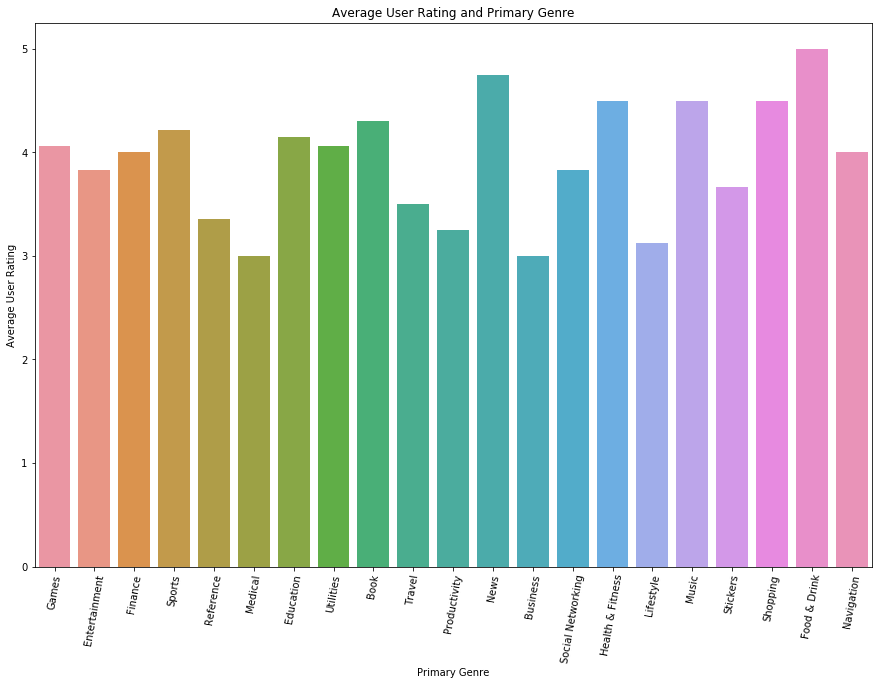

In [53]:
genre_list = list(dataset['Primary Genre'].unique())
genre_rating = []
for i in genre_list:
    x = dataset[dataset['Primary Genre'] == i]
    if(len(x)!=0):
        rating = sum(x['Average User Rating'])/len(x)
        genre_rating.append(rating)
    else:
        rating = sum(x['Average User Rating'])
        genre_rating.append(rating)


# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=genre_list, y=genre_rating)
plt.xticks(rotation=80)
plt.xlabel("Primary Genre")
plt.ylabel("Average User Rating")
plt.title("Average User Rating and Primary Genre")
plt.show()


In [54]:
data3 = data.copy()
data3['Genres'] = data3['Genres'].str.replace(',', ' ').str.replace('Games', ' ').str.replace('Entertainment', ' ').str.replace('Strategy', ' ')
data3['Genres'] = data3['Genres'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
data3['Genres'] = data3['Genres'].str.strip()
Non_Main_Genres = data3[~data3.Genres.str.contains('Puzzle') & \
                    ~data3.Genres.str.contains('Action') & \
                    ~data3.Genres.str.contains('Family') & \
                    ~data3.Genres.str.contains('Education') & \
                    ~data3.Genres.str.contains('Family') & \
                    ~data3.Genres.str.contains('Adventure') & \
                    ~data3.Genres.str.contains('Role') ].index
data3.drop(Non_Main_Genres , inplace = True)
data3.loc[data3['Genres'].str.contains('Puzzle'), 'Genres'] = 'Puzzle'
data3.loc[data3['Genres'].str.contains('Board'), 'Genres'] = 'Puzzle'
data3.loc[data3['Genres'].str.contains('Action'), 'Genres'] = 'Action'
data3.loc[data3['Genres'].str.contains('Adventure'), 'Genres'] = 'Adventure'
data3.loc[data3['Genres'].str.contains('Role'), 'Genres'] = 'Adventure'
data3.loc[data3['Genres'].str.contains('Family'), 'Genres'] = 'Family'
data3.loc[data3['Genres'].str.contains('Education'), 'Genres'] = 'Family'

In [55]:
genre_list = list(data3['Genres'].unique())
genre_rating = []
for i in genre_list:
    x = data3[data3['Genres'] == i]
    if(len(x)!=0):
        rating = sum(x['Average User Rating'])/len(x)
        genre_rating.append(rating)
    else:
        rating = sum(x['Average User Rating'])
        genre_rating.append(rating)




In [56]:
gen2 = data3.iloc[:, 10:11].values
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [57]:
labelencoder_gen = LabelEncoder()
gen2[:, 0] = labelencoder_gen.fit_transform(gen2[:, 0])


Text(0.5, 1.0, 'Average User Rating(4.0 and above) and Genres')

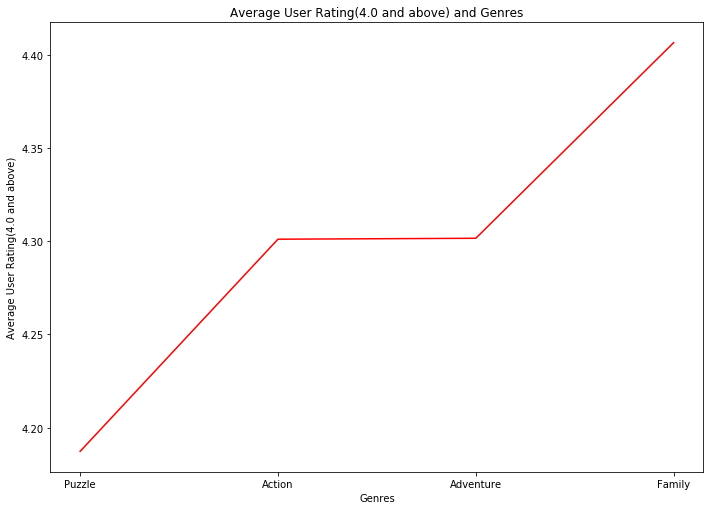

In [58]:
m = data3.iloc[:, 10:11].values
n = data3.iloc[:, 2:3].values
result = np.concatenate((m, n), axis = 1)
pd.DataFrame(result)
plt.plot(genre_list, genre_rating, color = 'red')
plt.xlabel("Genres")
plt.ylabel("Average User Rating(4.0 and above)")
plt.title("Average User Rating(4.0 and above) and Genres")

Text(0.5, 1, 'Boxplot of Average User Rating VS Genres')

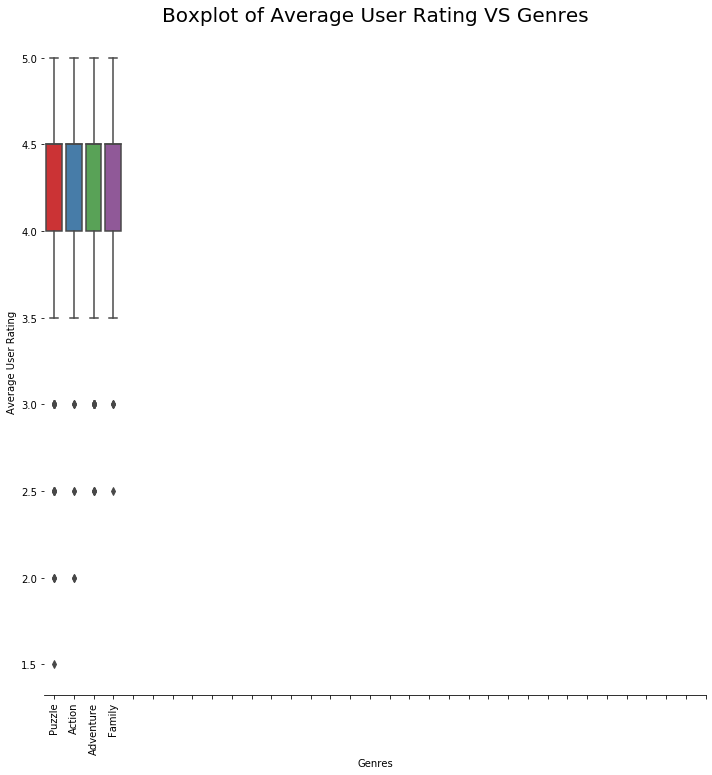

In [59]:
g = sns.catplot(x="Genres",y="Average User Rating",data=data3, kind="box", height = 10 ,
palette = "Set1")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Average User Rating")
plt.title('Boxplot of Average User Rating VS Genres',size = 20)

C:\Users\jawal\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

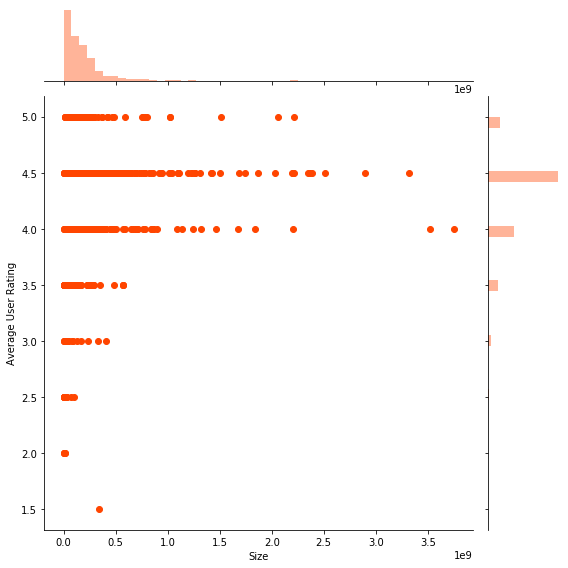

In [60]:
plt.figure(figsize = (10,10))
g = sns.jointplot(x="Size", y="Average User Rating",color = 'orangered', data=data3, size = 8);

In [61]:
data['new'] = pd.to_datetime(data['Current Version Release Date'])
data['new'].describe()


count                    1908
unique                    916
top       2019-07-29 00:00:00
freq                       33
first     2008-02-10 00:00:00
last      2019-12-07 00:00:00
Name: new, dtype: object

In [62]:
data['new'].max() 

Timestamp('2019-12-07 00:00:00')

In [63]:
data['new'][0] -  data['new'].max()

Timedelta('-921 days +00:00:00')

In [64]:
data['Current Version Release Date'] = (data['new'] -  data['new'].max()).dt.days
data['Current Version Release Date'].head()

0    -921
1    -942
2    -921
3   -4032
4   -3787
Name: Current Version Release Date, dtype: int64

Text(0.5, 1.0, 'Rating  VS Last Update( days ago )')

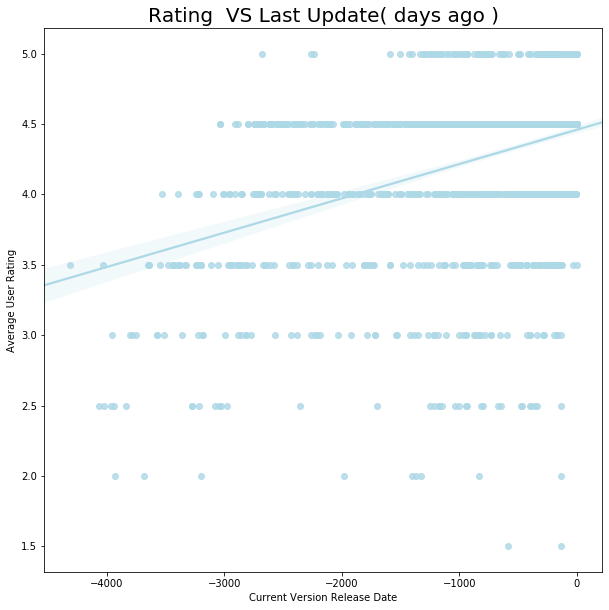

In [65]:
plt.figure(figsize = (10,10))
sns.regplot(x="Current Version Release Date", y="Average User Rating", color = 'lightblue',data=data );
plt.title('Rating  VS Last Update( days ago )',size = 20)